# SUUMOの文京区・豊島区70㎡以上の賃貸を対象とする
url = 'https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=13&sc=13105&sc=13116&cb=0.0&ct=9999999&et=9999999&cn=9999999&mb=70&mt=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&fw2='

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 初期設定　※今回は文京区・豊島区の70㎡以上の賃貸を対象としている
url = 'https://suumo.jp/jj/chintai/ichiran/FR301FC001/?ar=030&bs=040&ta=13&sc=13105&sc=13116&cb=0.0&ct=9999999&et=9999999&cn=9999999&mb=70&mt=9999999&shkr1=03&shkr2=03&shkr3=03&shkr4=03&fw2='
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

# 物件情報の取得
apartment_unit = soup.find_all(class_="cassetteitem")

# 物件情報のリスト化
name = []
address = []
station = []
age = []
rent = []
deposit = []
gratuity = []
madori = []
menseki = []

for apartment in apartment_unit:
     name.append(apartment.find(class_='cassetteitem_content-title').text)
     address.append(apartment.find(class_='cassetteitem_detail-col1').text)
     station.append(apartment.find(class_='cassetteitem_detail-text').text) #最寄り駅
     age.append(apartment.find(class_='cassetteitem_detail-col3').find('div').text) #築年数
     rent.append(apartment.find(class_='cassetteitem_price cassetteitem_price--rent').text) #家賃
     deposit.append(apartment.find(class_='cassetteitem_price cassetteitem_price--deposit').text) #敷金
     gratuity.append(apartment.find(class_='cassetteitem_price cassetteitem_price--gratuity').text) #礼金
     madori.append(apartment.find(class_='cassetteitem_madori').text) #間取り
     menseki.append(apartment.find(class_='cassetteitem_menseki').text) #広さ

# 抽出した物件情報を辞書に格納
data_list = {
    "name" : name,
    "address" : address,
    "station" : station,
    "age" : age,
    "rent" : rent,
    "deposit" : deposit,
    "gratuity" : gratuity,
    "madori" : madori,
    "menseki" : menseki,
}

# 辞書をデータフレーム化
df = pd.DataFrame(data_list)
df

,name,address,station,age,rent,deposit,gratuity,madori,menseki
0,東武東上線 北池袋駅 3階建 築3年,東京都豊島区池袋本町１,東武東上線/北池袋駅 歩5分,築3年,19.6万円,19.6万円,29.4万円,3LDK,72.7m2
1,根津２丁目ヘーベルハウス,東京都文京区根津２,東京メトロ千代田線/根津駅 歩6分,築2年,28.5万円,28.5万円,28.5万円,3LDK,86.81m2
2,茗荷谷パークレジデンス,東京都文京区大塚３,東京メトロ丸ノ内線/茗荷谷駅 歩7分,築33年,26.9万円,26.9万円,26.9万円,3LDK,88.63m2
3,ＪＲ山手線 西日暮里駅 3階建 築20年,東京都文京区千駄木４,ＪＲ山手線/西日暮里駅 歩8分,築20年,32万円,32万円,32万円,6LDK,124.38m2
4,千駄木４丁目戸建て,東京都文京区千駄木４,ＪＲ山手線/西日暮里駅 歩8分,築20年,32万円,32万円,32万円,4SLDK,124.38m2
5,ベルアストリア,東京都豊島区南大塚１,ＪＲ山手線/巣鴨駅 歩5分,築32年,35万円,35万円,35万円,5LDK,153m2
6,Ｍｅｒｖｅｉｌｌｅ（メルヴェイユ）,東京都豊島区池袋本町１,東武東上線/北池袋駅 歩7分,築3年,19.6万円,19.6万円,29.4万円,3LDK,72.7m2
7,東京メトロ千代田線 根津駅 3階建 築2年,東京都文京区根津２,東京メトロ千代田線/根津駅 歩6分,築2年,28.5万円,28.5万円,28.5万円,3LDK,86.81m2
8,白山1丁目戸建,東京都文京区白山１,都営三田線/白山駅 歩7分,築4年,45万円,90万円,45万円,3LDK,80.49m2
9,ザ・ライオンズ池袋,東京都豊島区池袋３,ＪＲ山手線/池袋駅 歩10分,新築,29.6万円,29.6万円,29.6万円,3LDK,71.08m2


# 物件情報の分析

In [11]:
# 分析するために数値化
df['new_age'] = df['age'].replace({"新築" : 0, "築" : "", "年": ""}, regex = True).astype(int) # 築年数を数値に変更してnew_ageという新しいカラムを作成
df['rent'] = df['rent'].replace({'万円' : ''}, regex = True).astype(float) # 家賃を数値に変更
df['deposit'] = df['deposit'].replace({'万円' : ''}, regex = True).astype(float) # 敷金を数値に変更
df['gratuity'] = df['gratuity'].replace({'-':0 , '万円' : ''}, regex = True).astype(float) # 礼金を数値に変更
df['menseki'] = df['menseki'].replace({'m2': ''}, regex = True).astype(float) # 面積を数値に変更
df['per_rent'] = df['rent']/df['menseki'] #分析用に1㎡あたり家賃を計算

# 数値化後のdfの確認
df

,name,address,station,age,rent,deposit,gratuity,madori,menseki,new_age,per_rent
0,東武東上線 北池袋駅 3階建 築3年,東京都豊島区池袋本町１,東武東上線/北池袋駅 歩5分,築3年,19.6,19.6,29.4,3LDK,72.70,3,0.269601
1,根津２丁目ヘーベルハウス,東京都文京区根津２,東京メトロ千代田線/根津駅 歩6分,築2年,28.5,28.5,28.5,3LDK,86.81,2,0.328303
2,茗荷谷パークレジデンス,東京都文京区大塚３,東京メトロ丸ノ内線/茗荷谷駅 歩7分,築33年,26.9,26.9,26.9,3LDK,88.63,33,0.303509
3,ＪＲ山手線 西日暮里駅 3階建 築20年,東京都文京区千駄木４,ＪＲ山手線/西日暮里駅 歩8分,築20年,32.0,32.0,32.0,6LDK,124.38,20,0.257276
4,千駄木４丁目戸建て,東京都文京区千駄木４,ＪＲ山手線/西日暮里駅 歩8分,築20年,32.0,32.0,32.0,4SLDK,124.38,20,0.257276
5,ベルアストリア,東京都豊島区南大塚１,ＪＲ山手線/巣鴨駅 歩5分,築32年,35.0,35.0,35.0,5LDK,153.00,32,0.228758
6,Ｍｅｒｖｅｉｌｌｅ（メルヴェイユ）,東京都豊島区池袋本町１,東武東上線/北池袋駅 歩7分,築3年,19.6,19.6,29.4,3LDK,72.70,3,0.269601
7,東京メトロ千代田線 根津駅 3階建 築2年,東京都文京区根津２,東京メトロ千代田線/根津駅 歩6分,築2年,28.5,28.5,28.5,3LDK,86.81,2,0.328303
8,白山1丁目戸建,東京都文京区白山１,都営三田線/白山駅 歩7分,築4年,45.0,90.0,45.0,3LDK,80.49,4,0.559076
9,ザ・ライオンズ池袋,東京都豊島区池袋３,ＪＲ山手線/池袋駅 歩10分,新築,29.6,29.6,29.6,3LDK,71.08,0,0.416432


Text(0, 0.5, 'per_rent')

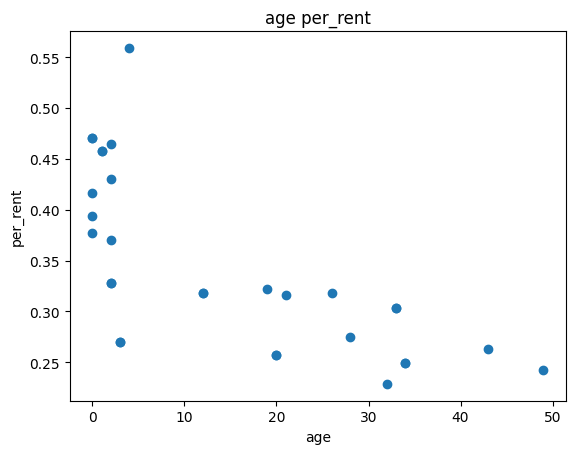

In [12]:
# 築年数と1㎡あたり家賃の関係

import matplotlib.pyplot as plt

x = df['new_age']
y = df['per_rent']

plt.scatter(x, y)
plt.title("age per_rent")
plt.xlabel("age")
plt.ylabel("per_rent")

Text(0, 0.5, 'rent')

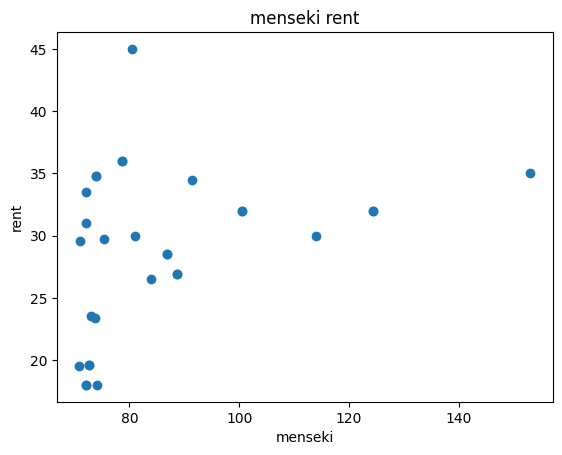

In [13]:
# 広さ（面積）と家賃の関係
x = df['menseki']
y = df['rent']

plt.scatter(x, y)
plt.title("menseki rent")
plt.xlabel("menseki")
plt.ylabel("rent")

# 地図上に表示

In [9]:
import folium

# 国土地理院の住所検索APIのベースURLを指定
map_url = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="

# dfの住所から変換した緯度を追加するための空配列
# dfの住所から変換した経度を追加するための空配列
latitude_list = []
longitude_list = []

# dfのname列の全ての値をリストとして取得
name_list = df["name"].values.tolist()

# 国土地理院のAPIを使用して、各住所から緯度と経度を取得、取得した緯度と経度をlatitude_listとlongitude_listにそれぞれ追加
for i in range(0,len(df)):
    q = df['address'][i]
    res = requests.get(map_url + q)
    latitude_list.append(res.json()[0]["geometry"]["coordinates"][1])
    longitude_list.append(res.json()[0]["geometry"]["coordinates"][0])

# 地図作成
map = folium.Map(location=[latitude_list[0], longitude_list[0]], zoom_start=13)

# 全ての物件の位置にマーカーを地図上に配置
for i in range(0, len(df)):
    folium.Marker(location=[latitude_list[i], longitude_list[i]], popup=name_list[i]).add_to(map)

map